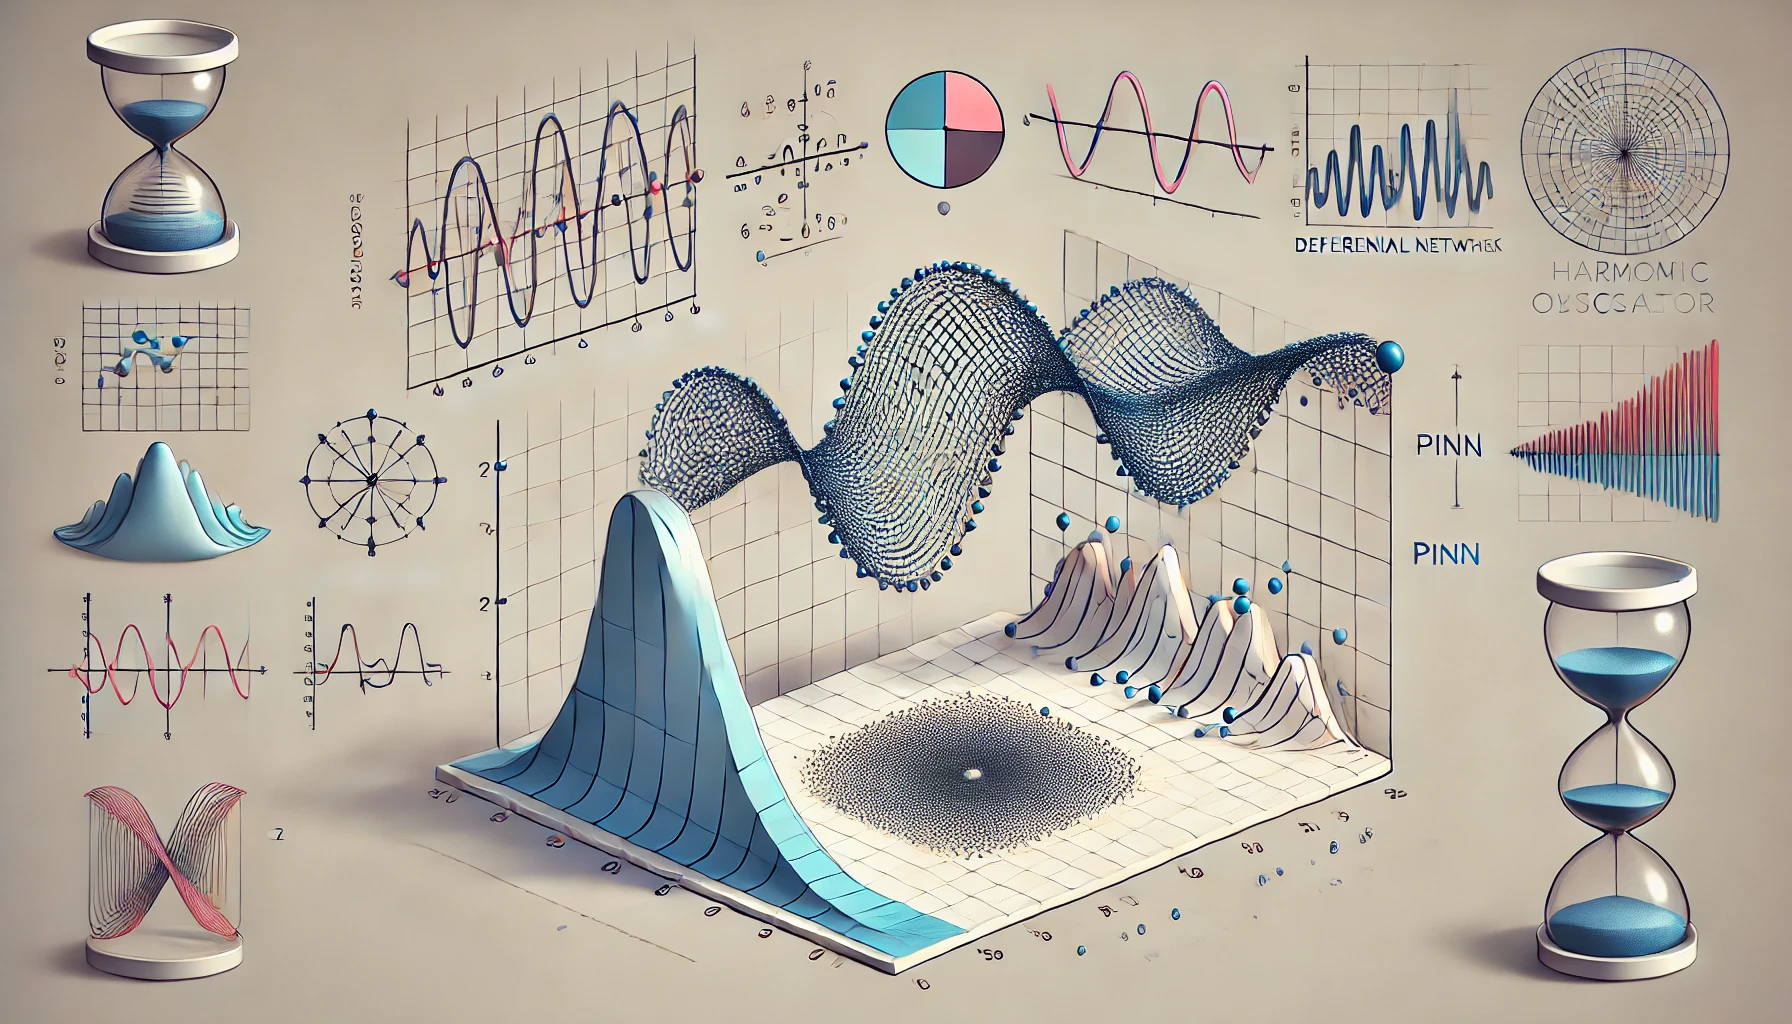

# **What is Physics-Informed-Neural-Network (PINN)?**

Machine learning has gained significant traction in the scientific community, but an important question remains: do these algorithms truly "comprehend" the scientific challenges they aim to address? In this context, we explore physics-informed neural networks (PINNs), a sophisticated method for embedding fundamental physical laws into machine learning models, enabling them to solve complex problems more effectively by leveraging scientific principles.

## The Machine Learning Paradigm Shift in Scientific Inquiry

Machine learning has precipitated a profound transformation in the methodology of scientific research. Traditionally, the scientific process has been structured around the dual pillars of theoretical formulation and empirical experimentation. Researchers manually construct well-defined theoretical frameworks and iteratively refine them by incorporating experimental observations, using this iterative process to generate predictive insights.

In contrast, with the rapid advancements in machine learning techniques and the exponential growth in the volume of scientific data, data-driven methodologies have gained considerable prominence. These approaches often circumvent the need for pre-established theoretical models, instead employing machine learning algorithms to extract patterns, analyze complex phenomena, and make predictions purely from data, offering a paradigm shift in how scientific problems are approached and solved.

## Modeling Experimental Data with Machine Learning

Let us explore a typical application of machine learning in scientific research. Consider a set of experimental data points derived from an unknown physical phenomenon, such as the orange points depicted in the animation below. The objective in many scientific endeavors is to construct a predictive model that can accurately forecast new experimental measurements based on the existing data.

A widely adopted approach to achieve this is through the use of neural networks. Given the position of a data point as an input (denoted $ x $), a neural network can be employed to predict its corresponding output value (denoted $ u $), as illustrated in the figure.

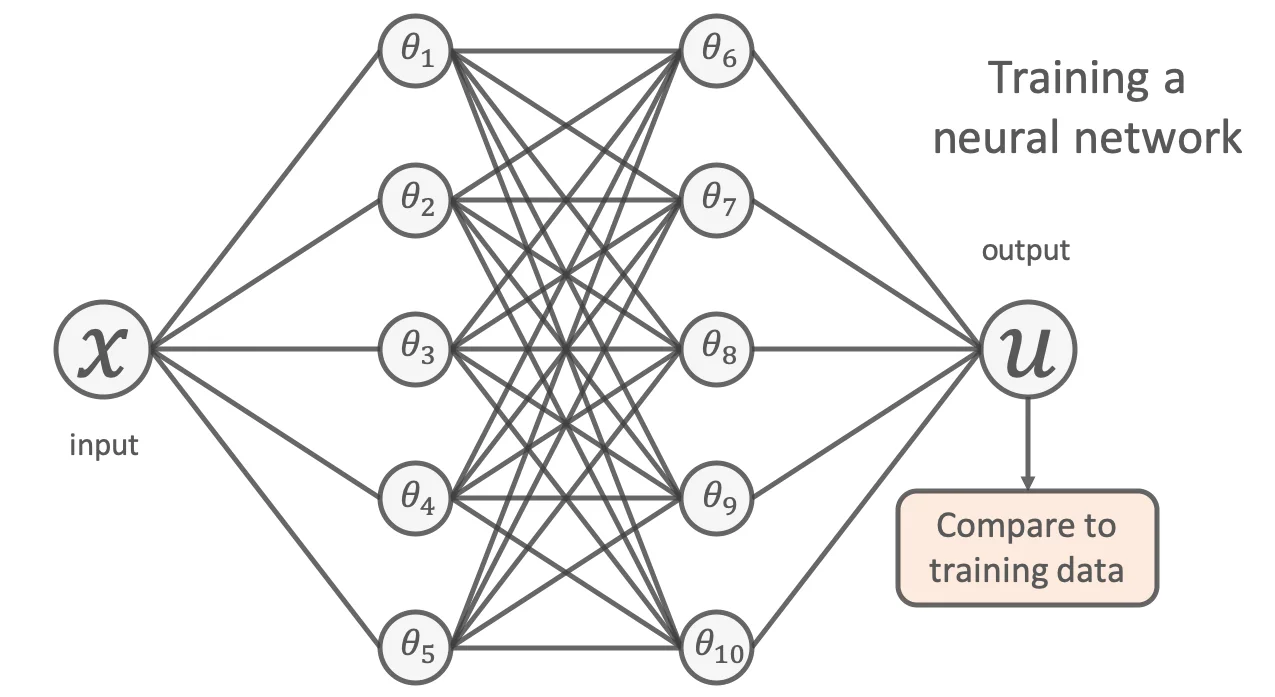

To train the model, we adjust the network’s free parameters (represented by  $\theta$ in the diagram) such that the neural network's predictions align as closely as possible with the observed experimental data. This optimization is typically carried out by minimizing the **mean-squared error (MSE)** between the network’s predictions and the true values of the training data points, defined by the following loss function:

$$
\mathrm{minimize}~ \frac{1}{N} \sum_{i=1}^{N} \left( u_{\mathrm{NN}}(x_{i}; \theta) - u_{\mathrm{true}}(x_i) \right)^2
$$

The animation demonstrates the outcome of training a neural network using this experimental data, highlighting the model’s ability to capture the underlying physical phenomenon through data-driven learning.

## The Limitations of Purely Data-Driven Approaches

One of the major drawbacks of purely data-driven machine learning approaches is their inherent limitations in generalization. While such models, like the neural network we discussed earlier, may fit the experimental data well within the range of the training points, they often struggle to extrapolate or accurately predict behavior outside of this dataset.

Upon closer examination of the actual physical process underlying the experimental data, it becomes evident that the neural network, despite its apparent success near the training data, fails to generalize to new, unseen conditions. This shortcoming underscores a fundamental issue: by solely relying on data without incorporating any underlying physical laws or scientific understanding, these models can be "naive" in their treatment of the problem. One could argue that such models do not truly comprehend the complexities of the scientific phenomena they are trying to model, as they lack the guiding influence of established physical principles.

## The Emergence of Scientific Machine Learning (SciML)

Now, imagine we already possess some prior knowledge about the physical process governing our data. Specifically, these data points are measurements from a well-known physical system: a damped harmonic oscillator.

This is a classical problem in physics, where the dynamics of the system can be described by the following second-order differential equation:

$$
m\frac{d^2u}{dx^2} + \mu \frac{du}{dx} + k u = 0
$$

In this equation, $m$ represents the mass of the oscillator, $\mu$ is the frictional damping coefficient, and $k$ is the spring constant. These terms encapsulate the system’s physical properties, guiding the behavior of the oscillator over time.

Recognizing the limitations of "naive" machine learning approaches, such as those that treat data in isolation without accounting for underlying physics, researchers are now focusing on integrating this prior scientific knowledge directly into machine learning models. This promising direction has given rise to the field of **[scientific machine learning (SciML)](https://www.osti.gov/biblio/1478744)**, which seeks to combine data-driven learning with known physical principles to create more accurate, interpretable, and robust models for scientific applications.

## Introducing Physics-Informed Neural Networks (PINNs)

One effective way to overcome the limitations of purely data-driven models is by utilizing **physics-informed neural networks (PINNs)** [1,2]. The core idea is straightforward: incorporate the known physical laws, expressed through differential equations, directly into the neural network’s training process by embedding them into the loss function.

To achieve this, we begin by sampling a set of training locations ($ \{x_{j}\}$) and feeding these inputs into the neural network. The next step involves calculating the gradients of the network's output with respect to its input at these sampled points. These gradients, which are typically analytically accessible for most neural networks via autodifferentiation, allow us to compute the residuals of the governing differential equation.

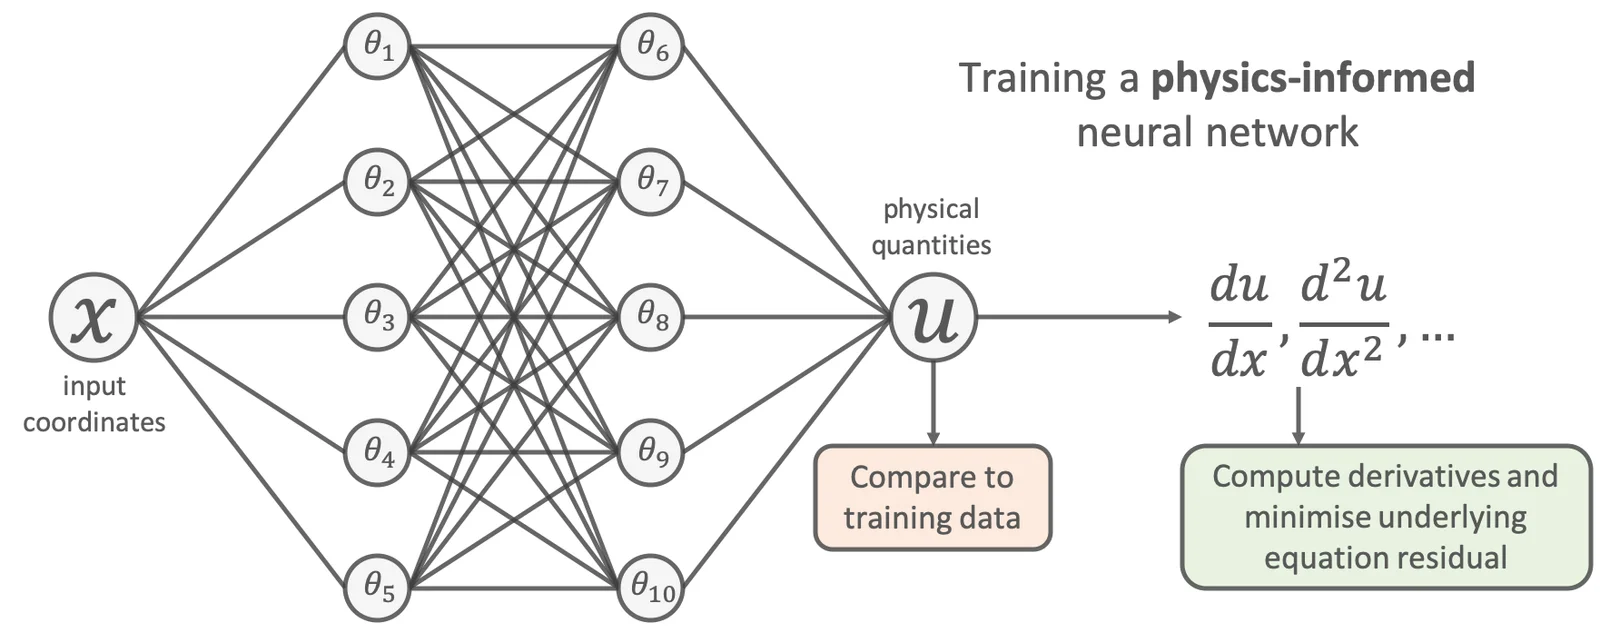

For the problem at hand, the loss function is modified by adding an extra term derived from the residuals of the differential equation:

$$
\mathrm{minimize} \left( \frac{1}{N} \sum^{N}_{i} \left( u_{\mathrm{NN}}(x_{i};\theta) - u_{\mathrm{true}}(x_i) \right)^2 \right) + \frac{1}{M} \sum^{M}_{j} \left( \left[ m\frac{d^2}{dx^2} + \mu \frac{d}{dx} + k \right] u_{\mathrm{NN}}(x_{j};\theta)  \right)^2
$$

This additional "physics loss" term ensures that the neural network's learned solution not only fits the data but is also consistent with the known physical laws. By embedding the differential equation directly into the training process, PINNs help bridge the gap between data-driven models and scientifically informed predictions, enabling a more accurate and physically meaningful solution.

# **Solving Damped Harmonic Oscillator**

## Problem overview

The example problem we solve here is the 1D damped harmonic oscillator:
$$
m \dfrac{d^2 x}{d t^2} + \mu \dfrac{d x}{d t} + kx = 0~,
$$
with the initial conditions
$$
x(0) = 1~~,~~\dfrac{d x}{d t} = 0~.
$$
We will focus on solving the problem for the under-damped state, i.e. when
$$
\delta < \omega_0~,~~~~~\mathrm{with}~~\delta = \dfrac{\mu}{2m}~,~\omega_0 = \sqrt{\dfrac{k}{m}}~.
$$
This has the following exact solution:
$$
x(t) = e^{-\delta t}(2 A \cos(\phi + \omega t))~,~~~~~\mathrm{with}~~\omega=\sqrt{\omega_0^2 - \delta^2}~.
$$

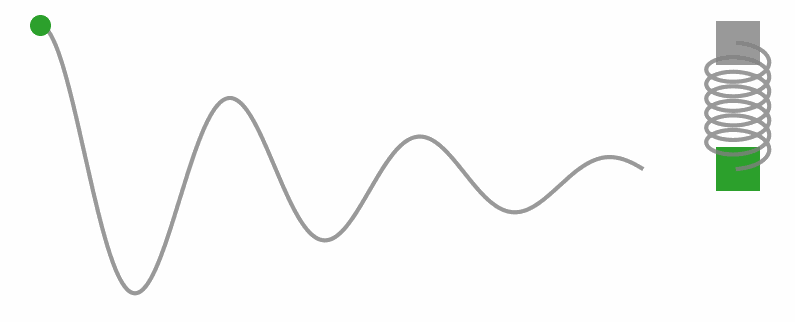

This GIF visually demonstrates the behavior of a **damped harmonic oscillator**. On the left, you see a green ball oscillating back and forth, representing the motion of a mass attached to a spring. Initially, the ball moves with a large amplitude, but as time progresses, the oscillations gradually decrease in size. This is due to **damping**, which causes energy to be lost from the system over time, typically through friction or resistance, leading to smaller and smaller oscillations.

On the right, you see a coiled spring that is being compressed and stretched in sync with the movement of the green ball. The spring's compression and extension are proportional to the ball's position, demonstrating how the spring resists the motion of the ball, with the restoring force diminishing the motion over time due to damping.

The key takeaway from this visual is that the system's oscillations are not perpetual; they decrease in amplitude until the system eventually comes to rest, which is characteristic of a damped harmonic oscillator.

## Workflow overview

1. **Training a Standard Neural Network**:  
We will first train a conventional neural network using a subset of the available data points. These training points represent only a small portion of the entire solution, and the goal of the network is to **interpolate** the solution between these points. The network learns by adjusting its parameters to closely fit the observed data, but it lacks any knowledge of the underlying physical process driving the solution. As a result, its ability to generalize beyond the training points is limited.

2. **Training a Physics-Informed Neural Network (PINN)**:  
Next, we will train a **physics-informed neural network (PINN)**. In this case, the goal is to **extrapolate** the solution beyond the training points, covering the full domain of the problem. The PINN achieves this by incorporating the underlying physical principles—represented by a differential equation—into its training process. By penalizing deviations from this differential equation in its loss function, the PINN learns not only from the observed data but also ensures that its predictions align with the known physics. This results in a model that can accurately predict behavior both inside and outside of the training data points.

## Environment Setup

We train the PINN using PyTorch, using the following environment set up:
```bash

conda create -n pinn python=3
conda activate pinn
conda install jupyter numpy matplotlib
conda install pytorch torchvision torchaudio -c pytorch
```

In [1]:
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os

We are preparing to build and train a neural network using PyTorch, for a physics-informed neural network (PINN) or a machine learning task. The libraries we are importing serve specific purposes:

- **PIL (Python Imaging Library)**: Useful for image manipulation, like loading or processing images for your task.
- **NumPy**: A powerful library for handling large, multi-dimensional arrays and matrices, often used to handle data in neural network workflows.
- **PyTorch (`torch` and `torch.nn`)**: PyTorch is a popular deep learning framework. `torch` handles tensors (multidimensional arrays), while `torch.nn` provides the tools to build and train neural networks.
- **Matplotlib (pyplot)**: A plotting library commonly used to visualize data, training progress, loss curves, or model predictions.

This setup is typical for creating and training models, enabling you to load and process data, build neural networks, and visualize results.

## GIF Creting Function

In [2]:
def save_gif_PIL(outfile, files, fps=5, loop=0):
    "Helper function for saving GIFs"
    imgs = [Image.open(file) for file in files]

    imgs[0].save(fp=outfile,
                 format='GIF',
                 append_images=imgs[1:],
                 save_all=True,
                 duration=int(1000/fps),
                 loop=loop)

The function `save_gif_PIL` is a helper utility for creating and saving GIFs using the **PIL (Python Imaging Library)**. Here's a breakdown:

- **Parameters**:
  - `outfile`: The filename where the GIF will be saved.
  - `files`: A list of image file paths to be included in the GIF.
  - `fps`: Frames per second, determining the playback speed of the GIF (default is 5).
  - `loop`: Specifies how many times the GIF should loop (0 means infinite loop).

- **Process**:
  - The function first opens all image files listed in `files` using `Image.open()`.
  - It saves the images as a GIF, using the first image as the base frame and appending the others.
  - `duration` sets the time each frame is displayed (calculated as 1000ms divided by `fps`), and `loop` controls the looping behavior.

This function simplifies the task of converting a series of images into a GIF with customizable playback speed and looping.

## 1D Damped Harmonic Oscillator Function

In [3]:
def oscillator(d, w0, x):
    """Defines the analytical solution to the 1D underdamped harmonic oscillator problem."""
    assert d < w0

    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*x)
    sin = torch.sin(phi+w*x)
    exp = torch.exp(-d*x)

    y  = exp*2*A*cos

    return y

This function, `oscillator`, defines the analytical solution for a **1D underdamped harmonic oscillator** problem. Here's an explanation of its components:

- **Parameters**:
  - `d`: Damping coefficient (must be less than `w0` for an underdamped system).
  - `w0`: The natural angular frequency of the oscillator.
  - `x`: A time or position variable where the solution is evaluated.

- **Process**:
  1. **Assertion**: The condition `d < w0` ensures that the system is underdamped, meaning it oscillates with diminishing amplitude.
  2. **Frequency Calculation**: The angular frequency of the damped system, `w`, is calculated using the formula \( w = \sqrt{w_0^2 - d^2} \).
  3. **Phase Shift**: The phase shift, `phi`, is computed using `arctan(-d/w)`.
  4. **Amplitude**: `A` defines the amplitude factor of the oscillation.
  5. **Oscillatory Components**: The cosine and sine components are calculated at each point `x`, along with the exponential decay factor `exp`.
  6. **Final Solution**: The result `y` represents the oscillator's displacement over time or position, factoring in both the oscillatory behavior and the damping effect.

This function returns the displacement `y` as a PyTorch tensor.

## Generating the Traing Data

We start by creating training data based on a segment of the exact analytical solution for the problem. Specifically, we use the parameters $\delta = 2$ and $ \omega_0 = 20 $, focusing on learning the solution within the domain $ x \in [0, 1] $. This provides a foundation for model training.

### Get the analytical solution over the full domain

In [4]:
d, w0 = 2, 20

x = torch.linspace(0,1,500).view(-1,1)
y = oscillator(d, w0, x).view(-1,1)
print(x.shape, y.shape)

torch.Size([500, 1]) torch.Size([500, 1])


### Slice out a small number of points from the LHS of the domain

In [5]:
x_data = x[0:200:20]
y_data = y[0:200:20]
print(x_data.shape, y_data.shape)

torch.Size([10, 1]) torch.Size([10, 1])


### Plotting the Sample

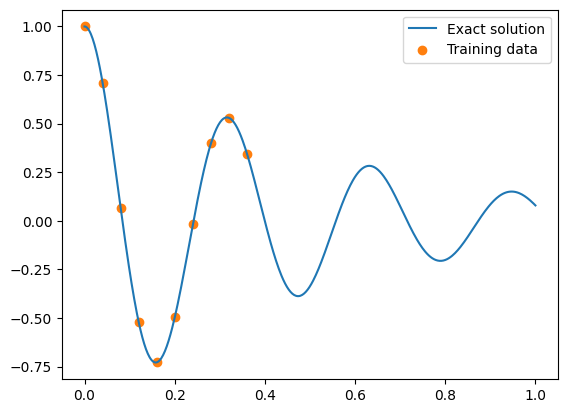

In [6]:
plt.figure()
plt.plot(x, y, label="Exact solution")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.legend()
plt.show()

## **Solving with Normal Neural Network**

1. **Training the Neural Network**:  
We proceed by training a standard fully connected neural network using the data generated from the analytical solution. The model is tasked with learning the relationship between input and output based on these training points, allowing it to approximate the underlying function within this limited range.

2. **Performance and Limitations**:  
While the neural network fits the solution well within the region defined by the training data, its predictive ability is limited. It struggles to extrapolate and produce accurate results outside the training domain. This highlights a common issue with purely data-driven approaches: they excel at interpolation but fail to generalize to unseen regions.

### Defining Fully Connected Neural Network (FCN) Class

In [7]:
class FCN(nn.Module):
    "Defines a connected network"

    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh

        self.fcs = nn.Sequential(*[nn.Linear(N_INPUT,
                                             N_HIDDEN),
                                   activation()])
        self.fch = nn.Sequential(*[nn.Sequential(*[nn.Linear(N_HIDDEN,
                                                             N_HIDDEN),
                                                   activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN,
                             N_OUTPUT)


    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

This `FCN` class defines a **Fully Connected Neural Network (FCN)** using PyTorch's `nn.Module`, consisting of multiple hidden layers, customizable activation functions, and input/output sizes. Here's a breakdown:

***Components***
- **`__init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS)`**:  
  - **`N_INPUT`**: Number of input features.
  - **`N_OUTPUT`**: Number of output features.
  - **`N_HIDDEN`**: Number of neurons in the hidden layers.
  - **`N_LAYERS`**: Number of hidden layers in the network.
  - **Activation function**: Uses `Tanh` as the non-linearity (you can switch this to other functions, e.g., ReLU if needed).

- **Layers**:
  - **`self.fcs`**: This is the first layer, connecting the input to the first hidden layer using `nn.Linear` followed by `Tanh` activation.
  - **`self.fch`**: This defines the sequence of hidden layers. For `N_LAYERS-1`, it stacks `Linear` layers with `Tanh` activations.
  - **`self.fce`**: This is the final output layer, mapping the hidden representation to the desired output size without activation (useful for regression tasks).

***Forward Pass***
- **`forward(self, x)`**:
  - Takes input `x` and passes it through the network sequentially:
    1. First through `fcs` (input to first hidden layer).
    2. Then through `fch` (hidden layers).
    3. Finally through `fce` (to the output).

This architecture is flexible, allowing you to define networks with various input, output, and hidden layer configurations.

### Defining the Plotting Function

In [8]:
def plot_result(x,y,x_data,y_data,yh,xp=None):
    "Pretty plot training results"
    plt.figure(figsize=(8,4))
    plt.plot(x,
             y,
             color="grey",
             linewidth=2,
             alpha=0.8,
             label="Exact solution")
    plt.plot(x,
             yh,
             color="tab:blue",
             linewidth=4,
             alpha=0.8,
             label="Neural network prediction")
    plt.scatter(x_data,
                y_data,
                s=60,
                color="tab:orange",
                alpha=0.4,
                label='Training data')

    if xp is not None:
        plt.scatter(xp,
                    -0*torch.ones_like(xp),
                    s=60, color="tab:green",
                    alpha=0.4,
                    label='Physics loss training locations')

    l = plt.legend(loc=(1.01,0.34),
                   frameon=False,
                   fontsize="large")

    plt.setp(l.get_texts(), color="k")
    plt.xlim(-0.05, 1.05)
    plt.ylim(-1.1, 1.1)
    plt.text(1.065,0.7,"Training step: %i"%(i+1),fontsize="xx-large",color="k")
    plt.axis("off")

### Creating the 'plots' Directory

In [9]:
if not os.path.exists("plots"):
    os.makedirs("plots")

### Training the Model

In [10]:
torch.manual_seed(123)

model = FCN(1,1,32,3)

optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3)

### Creating the GIF

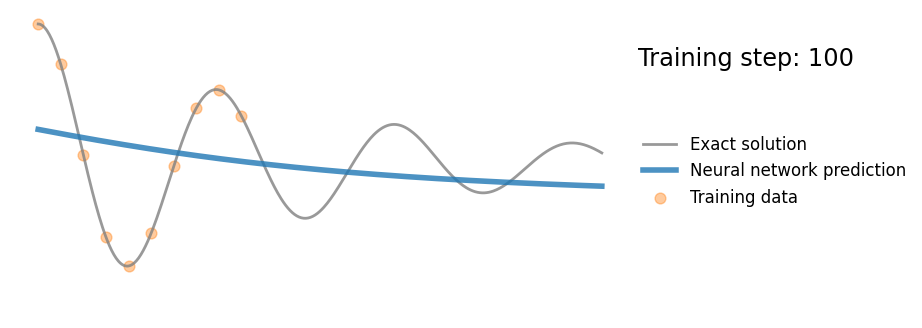

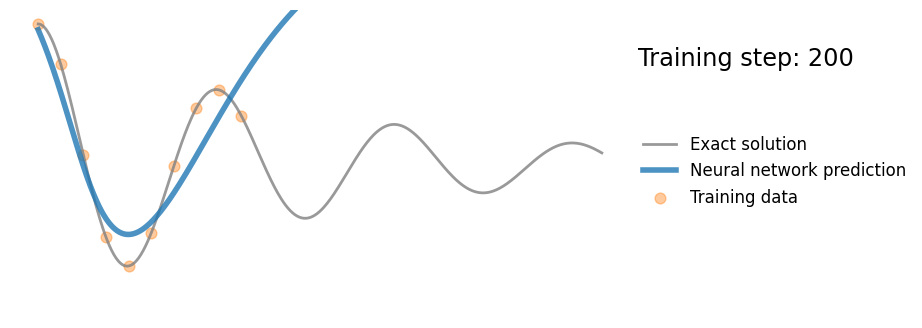

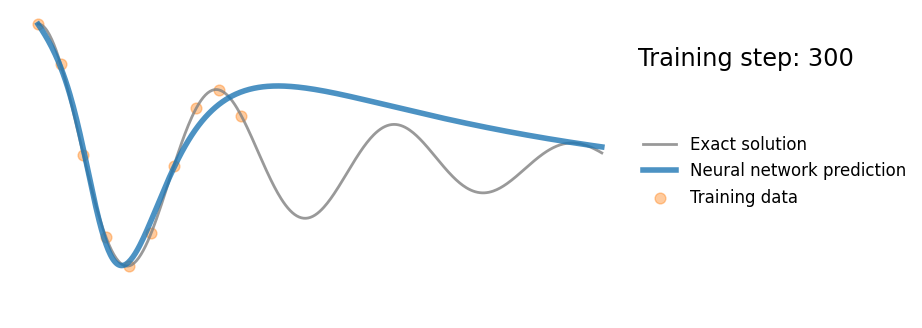

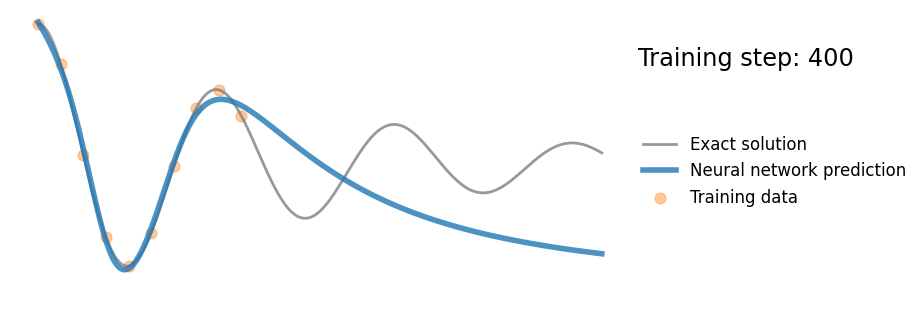

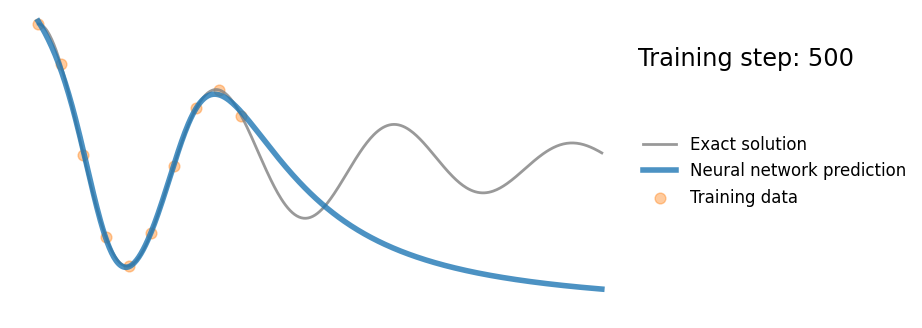

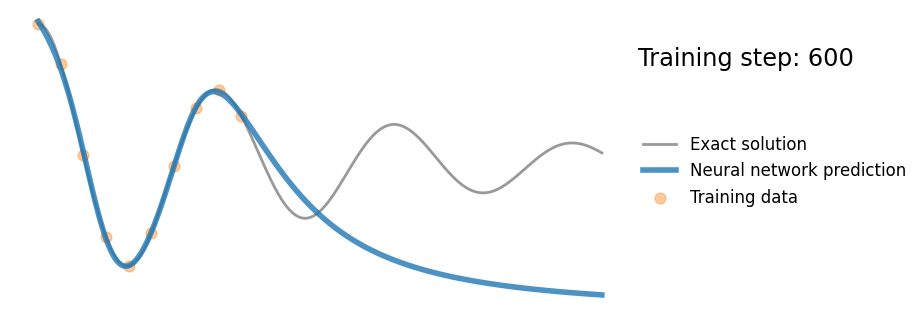

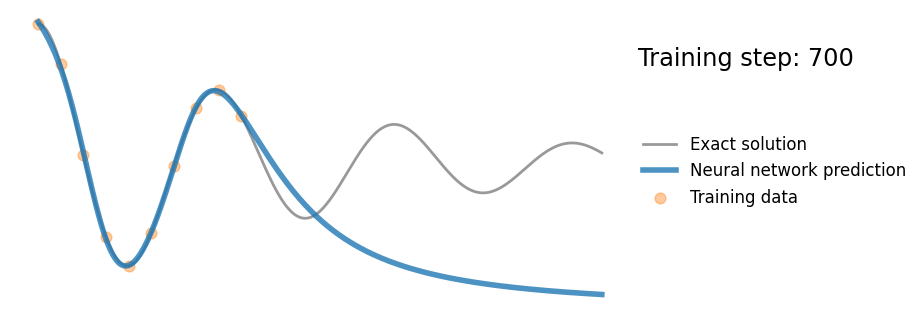

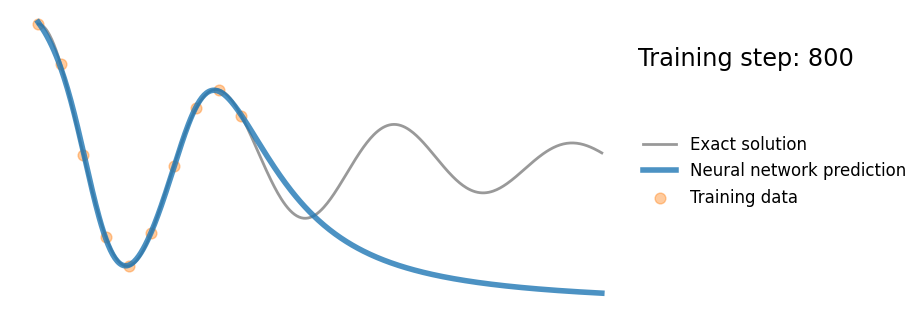

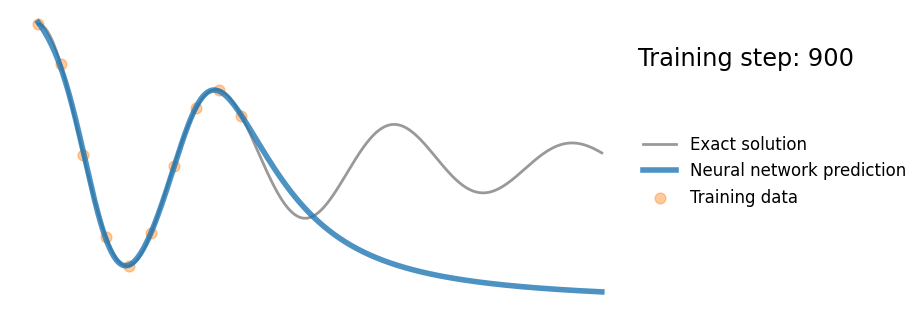

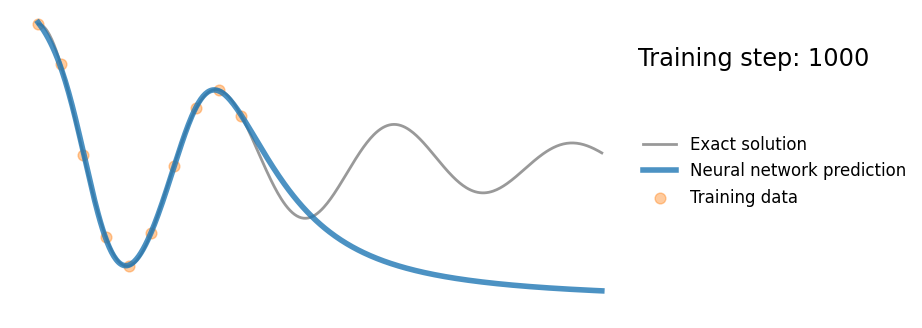

In [11]:
files = []
for i in range(1000):
    optimizer.zero_grad()
    yh = model(x_data)
    loss = torch.mean((yh-y_data)**2)   # use mean squared error
    loss.backward()
    optimizer.step()

    # plot the result as training progresses
    if (i+1) % 10 == 0:

        yh = model(x).detach()

        plot_result(x,
                    y,
                    x_data,
                    y_data,
                    yh)

        file = "plots/nn_%.8i.png"%(i+1)

        plt.savefig(file,
                    bbox_inches='tight',
                    pad_inches=0.1,
                    dpi=100,
                    facecolor="white")
        files.append(file)

        if (i+1) % 100 == 0: plt.show()
        else: plt.close("all")

save_gif_PIL("nn.gif", files, fps=20, loop=0)

This GIF visually demonstrates the learning process of a neural network as it attempts to approximate the solution of a physical system. The plot displays the **exact analytical solution** of a problem (gray curve), a set of **training data points** (orange circles), and the **neural network's prediction** (blue curve) over successive **training steps**.

At the beginning, the network's prediction (blue) starts as a simple linear approximation, far from the true solution. Over time, as the network undergoes more **training iterations**, it adjusts its weights and biases to better fit the training data. You can see the network progressively refining its output to align with both the training points and, ideally, the underlying physics governing the system, represented by the exact solution.

This GIF illustrates the key challenge of machine learning models: they may interpolate well within the range of the provided training data but struggle to generalize or match the exact solution in regions without data, showcasing the typical limitations of purely data-driven approaches.This GIF visually demonstrates the learning process of a neural network as it attempts to approximate the solution of a physical system. The plot displays the **exact analytical solution** of a problem (gray curve), a set of **training data points** (orange circles), and the **neural network's prediction** (blue curve) over successive **training steps**.

At the beginning, the network's prediction (blue) starts as a simple linear approximation, far from the true solution. Over time, as the network undergoes more **training iterations**, it adjusts its weights and biases to better fit the training data. You can see the network progressively refining its output to align with both the training points and, ideally, the underlying physics governing the system, represented by the exact solution.

This GIF illustrates the key challenge of machine learning models: they may interpolate well within the range of the provided training data but struggle to generalize or match the exact solution in regions without data, showcasing the typical limitations of purely data-driven approaches.

## **Solving with PINN**

1. **Incorporating the Differential Equation into the Loss Function**:  
To improve the network's performance beyond the training data, we integrate the underlying differential equation into the model’s loss function, known as the "physics loss." This additional term ensures that the network's learned solution aligns with the governing physics of the problem, promoting a more accurate and physically consistent model.

2. **Applying the Physics Loss**:  
The physics loss works by penalizing the residuals of the differential equation across a set of sampled points within the problem domain. In this case, we evaluate the physics loss at 30 evenly spaced points across the domain $ [0, 1] $. Using PyTorch's autodifferentiation capabilities, we compute the derivatives of the network’s output with respect to its input at these points, and subsequently calculate the residuals of the differential equation. This process helps the network align its predictions with both the observed data and the known physical laws.

### Sample Locations over the Problem Domain

In [12]:
x_physics = torch.linspace(0,1,30).view(-1,1).requires_grad_(True)
mu, k = 2*d, w0**2

### Training the Model

In [14]:
torch.manual_seed(123)

model = FCN(1,1,32,3)

optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-4)

### Creating the GIF

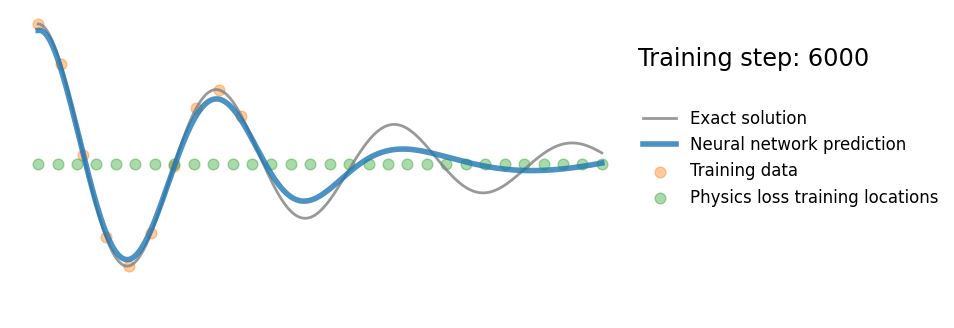

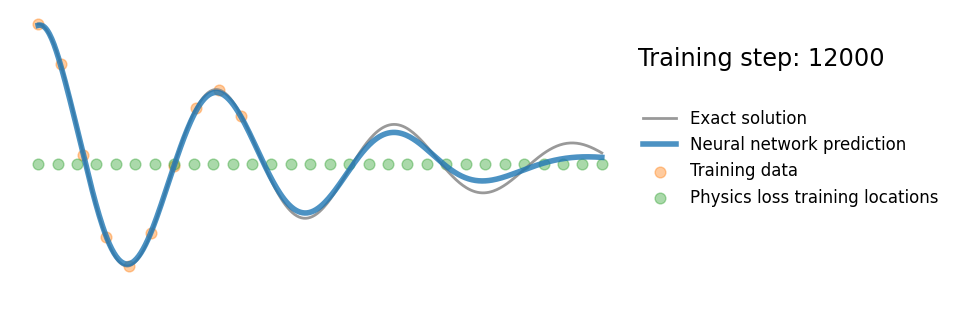

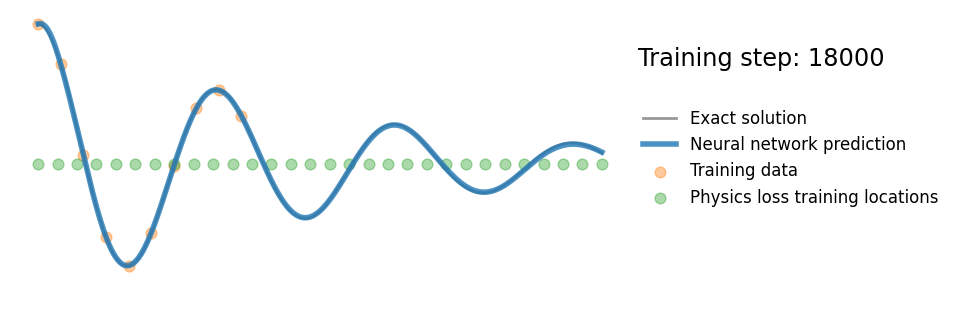

In [15]:
files = []
for i in range(20000):
    optimizer.zero_grad()

    # compute the "data loss"
    yh = model(x_data)
    loss1 = torch.mean((yh-y_data)**2)      # use mean squared error

    # compute the "physics loss"
    yhp = model(x_physics)

    # computes dy/dx
    dx  = torch.autograd.grad(yhp,
                              x_physics,
                              torch.ones_like(yhp),
                              create_graph=True)[0]

    # computes d^2y/dx^2
    dx2 = torch.autograd.grad(dx,
                              x_physics,
                              torch.ones_like(dx),
                              create_graph=True)[0]

    # computes the residual of the 1D harmonic oscillator differential equation
    physics = dx2 + mu*dx + k*yhp
    loss2 = (1e-4)*torch.mean(physics**2)

    # backpropagate joint loss
    loss = loss1 + loss2      # add two loss terms together

    loss.backward()
    optimizer.step()


    # plot the result as training progresses
    if (i+1) % 150 == 0:

        yh = model(x).detach()
        xp = x_physics.detach()

        plot_result(x,
                    y,
                    x_data,
                    y_data,
                    yh,
                    xp)

        file = "plots/pinn_%.8i.png"%(i+1)

        plt.savefig(file,
                    bbox_inches='tight',
                    pad_inches=0.1,
                    dpi=100,
                    facecolor="white")
        files.append(file)

        if (i+1) % 6000 == 0: plt.show()
        else: plt.close("all")

save_gif_PIL("pinn.gif", files, fps=20, loop=0)

This GIF illustrates the training process of a **physics-informed neural network (PINN)** as it progressively learns to approximate the solution of a physical system governed by a differential equation.

The plot shows:
- The **exact solution** of the problem (gray curve).
- **Training data points** (orange circles), representing observed data used to fit the model.
- The **neural network's prediction** (blue curve), which starts off inaccurate and gradually improves with training.
- The **physics loss training locations** (green points), where the residuals of the underlying differential equation are evaluated and penalized during training.

At each **training step**, the network not only learns from the training data but also incorporates the physical laws by minimizing the residuals of the governing differential equation, as represented by the green points. This physics-based regularization ensures that the model’s predictions not only interpolate between the training points but also align with the known physics of the problem, allowing it to generalize better across the domain.

As training progresses, the network’s prediction (blue) increasingly matches the exact solution (gray), showing how the inclusion of a physics loss term helps the model learn a more accurate and physically consistent solution, even in regions where no data is provided.

# Remarks

The physics-informed neural network (PINN) exhibits superior performance by accurately predicting the solution outside the training data range, thanks to its incorporation of the governing physical laws into the loss function. This approach allows the model to align its predictions with the underlying differential equations, facilitating generalization beyond the local vicinity of the training data. The inclusion of "physics loss" ensures the learned solution remains consistent with the analytical formulation of the physical process, effectively embedding domain-specific knowledge into the learning process. Consequently, the PINN demonstrates a capacity for extrapolating the solution far from the experimental data, indicating that it has internalized key aspects of the underlying physical phenomena.

Conversely, the naive neural network underperforms due to its purely data-driven nature, which disregards well-established scientific insights. Without the structural guidance provided by the physical laws, the model lacks the ability to generalize effectively beyond the data points. This scenario is analogous to attempting to interpret data from high-energy particle collisions without a foundational understanding of particle physics—relying exclusively on the data leads to poor generalization and limited predictive power.

While this example centers on a specific physics problem involving a damped harmonic oscillator, the PINN framework is broadly applicable to a variety of physical systems governed by partial differential equations (PDEs) and ordinary differential equations (ODEs). This approach is particularly valuable for addressing complex, multi-scale problems in fields such as fluid dynamics, electromagnetism, and structural mechanics, where traditional machine learning methods fall short. PINNs serve as a versatile and robust tool for embedding scientific knowledge into machine learning workflows, combining data-driven learning with physically consistent constraints to achieve enhanced accuracy and interpretability across a wide range of scientific and engineering domains.

# Conclusion

We have observed that machine learning introduces a transformative approach to scientific research, prioritizing data-driven learning over traditional methods. By integrating well-established physical laws into machine learning frameworks, we can develop more robust and effective models. These models not only learn from empirical data but also leverage and build upon pre-existing scientific knowledge, resulting in more accurate and physically consistent predictions. This synergy between data-driven approaches and domain-specific insights enhances the model's ability to generalize and solve complex problems in various scientific disciplines.